<H1>House Price Prediction Challenge Hackathon!</H1>
https://www.machinehack.com

<b><H3>Objective :</H3></b> Task is to accurately predict the house prices in India. Accurately predicting house prices can be a daunting task. The buyers are just not concerned about the size(square feet) of the house and there are various other factors that play a key role to decide the price of a house/property. It can be extremely difficult to figure out the right set of attributes that are contributing to understanding the buyer's behavior as such. This dataset has been collected across various property aggregators across India. 

<b><H3>Attributes Description:</b></H3>

POSTED_BY - Category marking who has listed the property

UNDER_CONSTRUCTION - Under Construction or Not

RERA - Rera approved or Not

BHK_NO - Number of Rooms

HK_OR_RK - Type of property

SQUARE_FT - Total area of the house in square feet

READY_TO_MOVE - Category marking Ready to move or Not

RESALE - Category marking Resale or not

ADDRESS - Address of the property

LONGITUDE - Longitude of the property

LATITUDE - Latitude of the property

---

<h1>1. Introduction with Data </h1>

---

<b><h3>Import librabries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b><h3>Load data file

In [2]:
df = pd.read_csv('Train.csv')
df.sample(5)

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
28836,Dealer,0,0,3,BHK,1300.712295,1,1,"Dahisar (East),Maharashtra",19.256471,72.868815,210.0
15741,Owner,0,0,3,BHK,992.248062,1,1,"Satara Parisar,Aurangabad",19.848361,75.306469,32.0
11507,Owner,0,0,3,BHK,968.032418,1,1,"Barasat,Kolkata",22.747639,88.600902,43.0
15756,Dealer,0,1,3,BHK,1072.327388,1,1,"Worli,Lalitpur",19.016700,72.816700,490.0
4073,Owner,0,0,2,BHK,780.116110,1,1,"Jyoti Nagar,Aurangabad",29.974075,76.841097,43.0


In [3]:
#dimension of dataset
df.shape

(29451, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
#Check if there is any NULL values
df.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

<H1>2. EDA 

In [6]:
df.columns

Index(['POSTED_BY', 'UNDER_CONSTRUCTION', 'RERA', 'BHK_NO.', 'BHK_OR_RK',
       'SQUARE_FT', 'READY_TO_MOVE', 'RESALE', 'ADDRESS', 'LONGITUDE',
       'LATITUDE', 'TARGET(PRICE_IN_LACS)'],
      dtype='object')

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
UNDER_CONSTRUCTION,29451.0,0.179756,3.839908e-01,0.000000,0.000000,0.000000,0.000000,1.000000e+00
RERA,29451.0,0.317918,4.656753e-01,0.000000,0.000000,0.000000,1.000000,1.000000e+00
BHK_NO.,29451.0,2.392279,8.790913e-01,1.000000,2.000000,2.000000,3.000000,2.000000e+01
SQUARE_FT,29451.0,19802.170190,1.901335e+06,3.000000,900.021130,1175.056750,1550.688124,2.545455e+08
READY_TO_MOVE,29451.0,0.820244,3.839908e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
RESALE,29451.0,0.929578,2.558613e-01,0.000000,1.000000,1.000000,1.000000,1.000000e+00
LONGITUDE,29451.0,21.300255,6.205306e+00,-37.713008,18.452663,20.750000,26.900926,5.991288e+01
LATITUDE,29451.0,76.837695,1.055775e+01,-121.761248,73.798100,77.324137,77.828740,1.529627e+02
TARGET(PRICE_IN_LACS),29451.0,142.898746,6.568807e+02,0.250000,38.000000,62.000000,100.000000,3.000000e+04


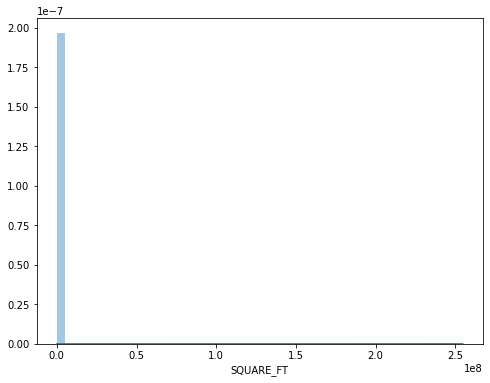

In [8]:
#Plot distribution of - SQUARE_FT

plt.figure(figsize=(8,6))
sns.distplot(df['SQUARE_FT'])

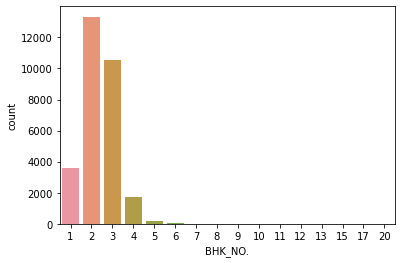

In [9]:
#Count Plot distribution of - 'BHK_NO.'

sns.countplot(df['BHK_NO.'])

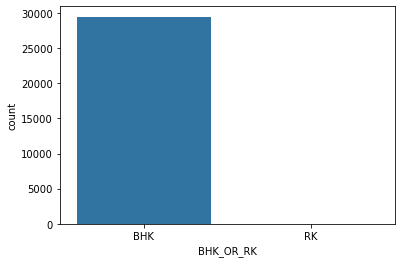

In [10]:
#Count values of 'BHK_OR_RK' field

sns.countplot(df['BHK_OR_RK']) 

In [11]:
df['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

<b>Only two field exist in 'BHK_OR_RK' field - mostly BHK

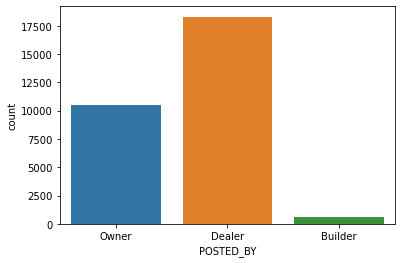

In [12]:
#Count values of 'POSTED_BY'

sns.countplot(df['POSTED_BY'])

In [13]:
df['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

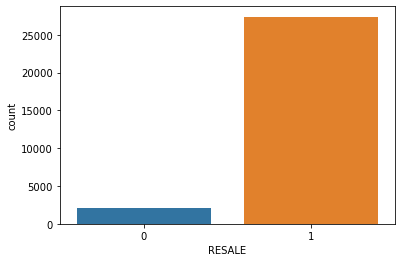

In [14]:
#Count values of 'RESALE'

sns.countplot(df['RESALE'])

In [15]:
df['RESALE'].value_counts()

1    27377
0     2074
Name: RESALE, dtype: int64

<b> <h3><font color = 'blue'> Let's see the distribution of 'TARGET(PRICE_IN_LACS)'

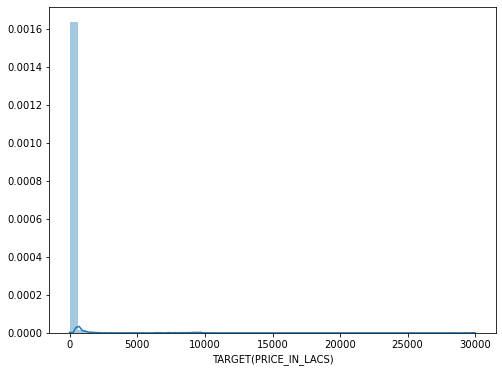

In [16]:
plt.figure(figsize=(8,6))
sns.distplot(df['TARGET(PRICE_IN_LACS)'])

<b>Data is skewed, possibility of some outliers

In [17]:
len(df[df['TARGET(PRICE_IN_LACS)']>400])/len(df)

0.03144205629689994

<b><font color ='red'>Only 3% of data of column 'TARGET(PRICE_IN_LACS)' has values over 400</font>

# 3. Feature Engineering

<b>Let's create dummy variables for categorical variables

In [18]:
#two values of field BHK_OR_RK has been converted to 0 and 1


bhk_rk = {'BHK':1,'RK':0}
df['BHK_OR_RK']=df['BHK_OR_RK'].map(bhk_rk) 

In [19]:
 #three values of field POSTED_BY has been converted dummies
    
df = pd.get_dummies(df, columns=['POSTED_BY'])

In [20]:
#drop the address field as this has no numerical importance

df = df.drop('ADDRESS', axis=1)

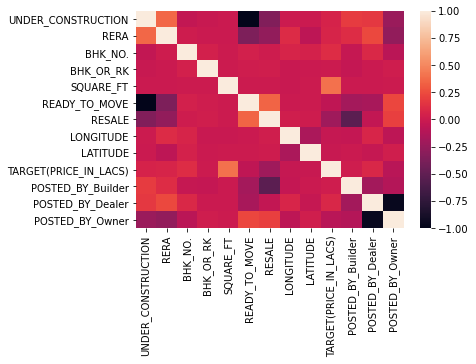

In [21]:
#check the co-relation of the fields

sns.heatmap(df.corr())

In [22]:
df.corr()['UNDER_CONSTRUCTION']

UNDER_CONSTRUCTION       1.000000
RERA                     0.363826
BHK_NO.                 -0.040712
BHK_OR_RK               -0.020719
SQUARE_FT               -0.004204
READY_TO_MOVE           -1.000000
RESALE                  -0.347405
LONGITUDE                0.006440
LATITUDE                -0.000381
TARGET(PRICE_IN_LACS)    0.055399
POSTED_BY_Builder        0.187078
POSTED_BY_Dealer         0.168987
POSTED_BY_Owner         -0.227133
Name: UNDER_CONSTRUCTION, dtype: float64

In [23]:
df = df.drop('UNDER_CONSTRUCTION', axis=1) #UNDER_CONSTRUCTION has negative correlation exist with READY_TO_MOVE

In [24]:
df = df[(df['SQUARE_FT']>300)] #few houses have very less SQUARE_FT area which may be unrealistic

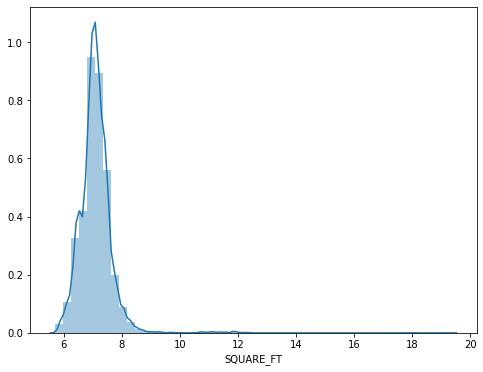

In [25]:
#we are taking log of SQUARE_FT to avoid skewed distribution 

df['SQUARE_FT'] = np.log1p(df['SQUARE_FT']) 

plt.figure(figsize=(8,6))
sns.distplot(df['SQUARE_FT'])

In [26]:
df.head()

,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Builder,POSTED_BY_Dealer,POSTED_BY_Owner
0,0,2,1,7.171070,1,1,12.969910,77.597960,55.0,0,0,1
1,0,2,1,7.151485,1,1,12.274538,76.644605,51.0,0,1,0
2,0,2,1,6.839647,1,1,12.778033,77.632191,43.0,0,0,1
3,1,2,1,6.836175,1,1,28.642300,77.344500,62.5,0,0,1
4,0,2,1,6.907765,0,1,22.592200,88.484911,60.5,0,1,0


---
<b><h3>Preparing data for model building

In [27]:
#Divide the data into Feature and Label component
#Taking log of price column to reduce its skewness

X = df.drop('TARGET(PRICE_IN_LACS)',axis=1).values
y = np.log1p(df['TARGET(PRICE_IN_LACS)']).values

In [28]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [29]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---


<h1>4. Apply Machine Learning Models for prediction
    
    
---

In [38]:
#import error metrics

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_squared_log_error

In [37]:
#Revert y_true and y_train to real values by taking exponentials 

y_true = np.expm1(y_test).reshape(8806, 1)
y_train_true = np.expm1(y_train).reshape(20547, 1) 

<h3><b>A) Random Forest

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor()

RandomForestRegressor()

In [31]:
#Using cross validation to tune hyperparameters

rf = RandomForestRegressor()
parameters = {
    'n_estimators': [190, 200, 210, 220, 230],
    'max_depth': [2, 4, 8, 16, 32, None]
    
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [190, 200, 210, 220, 230]})

In [32]:
#best parameters

cv.best_params_

{'max_depth': 16, 'n_estimators': 220}

In [33]:
#predict the value of test set

pred_RF = np.expm1(cv.predict(X_test))

<b><font color='blue'>Error Metrics of Random Forest Model for test sets 

In [40]:
print("mean_squared_error=",mean_squared_error(y_true,pred_RF))
print("explained_variance_score=",explained_variance_score(y_true,pred_RF))
print("root_mean_squared_log_error=",np.sqrt(mean_squared_log_error(y_true,pred_RF)))
print("r2_score=",r2_score(y_true,pred_RF))

mean_squared_error= 31234.104436644608
explained_variance_score= 0.9261113715416451
root_mean_squared_log_error= 0.344782313674155
r2_score= 0.9259693620897165


<b><font color='blue'>Error Metrics of Random Forest Model for train sets</b></font>

variation in test and train value may imply overfitting or underfitting

In [41]:
pred_train_RF = np.expm1(cv.predict(X_train))

print("mean_squared_error=",mean_squared_error(y_train_true,pred_train_RF))
print("explained_variance_score=",explained_variance_score(y_train_true,pred_train_RF))
print("root_mean_squared_log_error=",np.sqrt(mean_squared_log_error(y_train_true,pred_train_RF)))
print("r2_score=",r2_score(y_train_true,pred_train_RF))

mean_squared_error= 27570.765727672744
explained_variance_score= 0.9371369027138181
root_mean_squared_log_error= 0.17938617586307434
r2_score= 0.9369885489229228


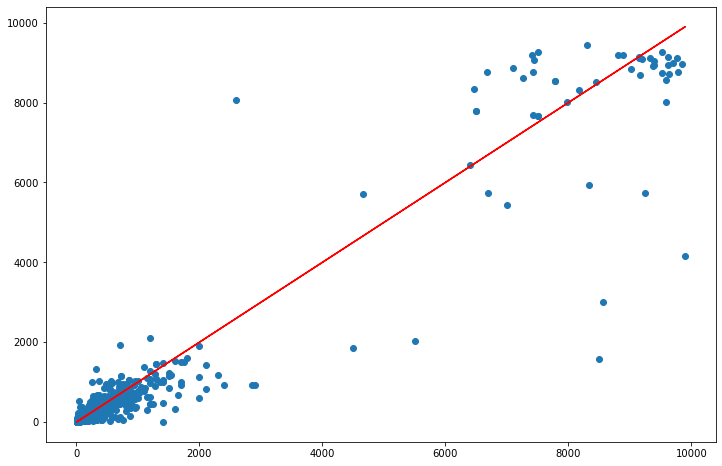

In [42]:
#plot of prediction and actual value

plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_RF)
plt.plot(y_true,y_true,'r')

<h3><b>A) GradientBoosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor
GradientBoostingRegressor()

GradientBoostingRegressor()

In [45]:
gb = GradientBoostingRegressor()
parameters = {
    'n_estimators': [140, 150, 160],
    'max_depth': [6,8],
    'learning_rate': [0.05, 0.1]
}

cv_gb = GridSearchCV(gb, parameters, cv=5)

In [46]:
cv_gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [6, 8],
                         'n_estimators': [140, 150, 160]})

In [48]:
#best parameters

cv_gb.best_params_

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 160}

In [49]:
#predict the value of test set

pred_gb = np.expm1(cv_gb.predict(X_test))

<b><font color='blue'>Error Metrics of GradientBoosting Model for test sets 

In [50]:
print("mean_squared_error=",mean_squared_error(y_true,pred_gb))
print("explained_variance_score=",explained_variance_score(y_true,pred_gb))
print("root_mean_squared_log_error=",np.sqrt(mean_squared_log_error(y_true,pred_gb)))
print("r2_score=",r2_score(y_true,pred_gb))

mean_squared_error= 33708.12234240091
explained_variance_score= 0.9202269420719132
root_mean_squared_log_error= 0.3262230881169502
r2_score= 0.9201054794182568


<b><font color='blue'>Error Metrics of GradientBoosting Model for train sets 

In [52]:
pred_train_gb = np.expm1(cv_gb.predict(X_train))

print("mean_squared_error=",mean_squared_error(y_train_true,pred_train_gb))
print("explained_variance_score=",explained_variance_score(y_train_true,pred_train_gb))
print("root_mean_squared_log_error=",np.sqrt(mean_squared_log_error(y_train_true,pred_train_gb)))
print("r2_score=",r2_score(y_train_true,pred_train_gb))

mean_squared_error= 3746.335531641046
explained_variance_score= 0.9915266554905053
root_mean_squared_log_error= 0.2254935589289477
r2_score= 0.9914379585825801


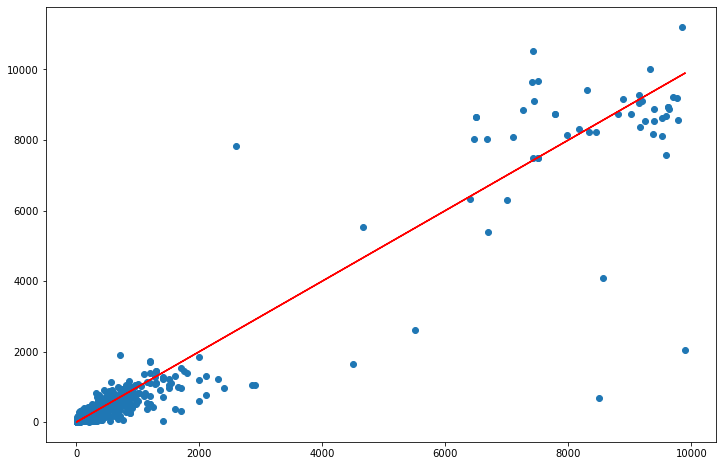

In [53]:
#plot of prediction and actual value

plt.figure(figsize=(12,8))
plt.scatter(y_true,pred_gb)
plt.plot(y_true,y_true,'r')

<b>GradientBoosting Model performs better

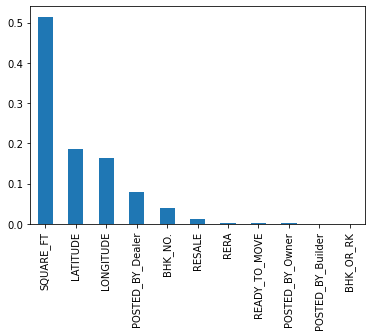

In [58]:
model_gb_fixed = GradientBoostingRegressor(n_estimators=160, max_depth=8, learning_rate=0.1)
model_gb_fixed.fit(X_train,y_train)

feature = df.drop('TARGET(PRICE_IN_LACS)',axis=1)
imp_feat=pd.Series(model_gb_fixed.feature_importances_,index=feature.columns)
---imp_feat.sort_values(ascending=False).plot(kind='bar')

---

<font color = red>The last model was used for predict the house prices of the "Test Data"

---